In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-shopping-dataset/file.csv
/kaggle/input/online-shopping-dataset/file.xlsx


### Loading Data and Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import iplot, plot

In [3]:
sns.set_palette("pastel")

In [4]:
df = pd.read_csv(r"/kaggle/input/online-shopping-dataset/file.csv")

### Look at some info ##

In [5]:
df.head(10)

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,...,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.50,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.50,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,...,122.77,6.50,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,...,81.50,6.50,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.50,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
5,5,17850.0,M,Chicago,12.0,16701.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.50,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
6,6,17850.0,M,Chicago,12.0,16702.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.50,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
7,7,17850.0,M,Chicago,12.0,16703.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,...,81.50,6.50,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
8,8,17850.0,M,Chicago,12.0,16704.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,256.88,6.50,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
9,9,17850.0,M,Chicago,12.0,16710.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,28.78,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52955 entries, 0 to 52954
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           52955 non-null  int64  
 1   CustomerID           52924 non-null  float64
 2   Gender               52924 non-null  object 
 3   Location             52924 non-null  object 
 4   Tenure_Months        52924 non-null  float64
 5   Transaction_ID       52924 non-null  float64
 6   Transaction_Date     52924 non-null  object 
 7   Product_SKU          52924 non-null  object 
 8   Product_Description  52924 non-null  object 
 9   Product_Category     52955 non-null  object 
 10  Quantity             52924 non-null  float64
 11  Avg_Price            52924 non-null  float64
 12  Delivery_Charges     52924 non-null  float64
 13  Coupon_Status        52924 non-null  object 
 14  GST                  52924 non-null  float64
 15  Date                 52924 non-null 

In [7]:
df.isna().sum()

Unnamed: 0               0
CustomerID              31
Gender                  31
Location                31
Tenure_Months           31
Transaction_ID          31
Transaction_Date        31
Product_SKU             31
Product_Description     31
Product_Category         0
Quantity                31
Avg_Price               31
Delivery_Charges        31
Coupon_Status           31
GST                     31
Date                    31
Offline_Spend           31
Online_Spend            31
Month                    0
Coupon_Code            400
Discount_pct           400
dtype: int64

In [8]:
df.describe()

,Unnamed: 0,CustomerID,Tenure_Months,Transaction_ID,Quantity,Avg_Price,Delivery_Charges,GST,Offline_Spend,Online_Spend,Month,Discount_pct
count,52955.000000,52924.00000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52955.000000,52555.000000
mean,26477.000000,15346.70981,26.127995,32409.825675,4.497638,52.237646,10.517630,0.137462,2830.914141,1893.109119,6.652800,19.953382
std,15286.936089,1766.55602,13.478285,8648.668977,20.104711,64.006882,19.475613,0.045825,936.154247,807.014092,3.333664,8.127108
min,0.000000,12346.00000,2.000000,16679.000000,1.000000,0.390000,0.000000,0.050000,500.000000,320.250000,1.000000,10.000000
25%,13238.500000,13869.00000,15.000000,25384.000000,1.000000,5.700000,6.000000,0.100000,2500.000000,1252.630000,4.000000,10.000000
50%,26477.000000,15311.00000,27.000000,32625.500000,1.000000,16.990000,6.000000,0.180000,3000.000000,1837.870000,7.000000,20.000000
75%,39715.500000,16996.25000,37.000000,39126.250000,2.000000,102.130000,6.500000,0.180000,3500.000000,2425.350000,9.000000,30.000000
max,52954.000000,18283.00000,50.000000,48497.000000,900.000000,355.740000,521.360000,0.180000,5000.000000,4556.930000,12.000000,30.000000


In [9]:
df.describe(exclude = np.number)

,Gender,Location,Transaction_Date,Product_SKU,Product_Description,Product_Category,Coupon_Status,Date,Coupon_Code
count,52924,52924,52924,52924,52924,52955,52924,52924,52555
unique,2,5,365,1145,404,21,3,365,48
top,F,Chicago,2019-11-27,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Apparel,Clicked,11/27/2019,SALE20
freq,33007,18380,335,3511,3511,18126,26926,335,6373


### Data Cleaning

In [10]:
# Drop unnecessary columns
df.drop(columns = ['Unnamed: 0','Product_SKU','Product_Description','Coupon_Code'],inplace=True)

In [11]:
df.dropna(thresh = 5, inplace = True)

In [12]:
df.isna().sum()

CustomerID            0
Gender                0
Location              0
Tenure_Months         0
Transaction_ID        0
Transaction_Date      0
Product_Category      0
Quantity              0
Avg_Price             0
Delivery_Charges      0
Coupon_Status         0
GST                   0
Date                  0
Offline_Spend         0
Online_Spend          0
Month                 0
Discount_pct        400
dtype: int64

### Male and Female

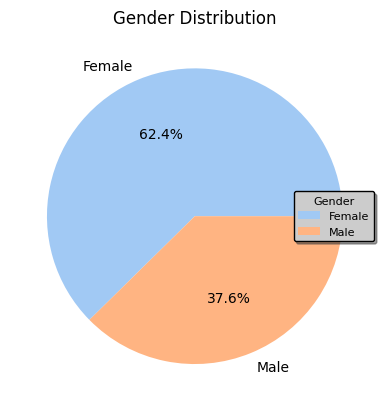

In [13]:
gender = df['Gender'].value_counts()
plt.pie(gender, radius=1, labels=['Female', 'Male'], autopct='%.1f%%')
plt.legend(
    loc='right',
    fontsize=8,
    shadow=True,
    facecolor='#ccc',
    edgecolor='#000',
    title='Gender',
    title_fontsize=8)
plt.title('Gender Distribution')
plt.show()

**We can see:**
* There are more transactions made by female than male

### Location

In [14]:
location_counts = df['Location'].value_counts()
location_counts

Location
Chicago          18380
California       16136
New York         11173
New Jersey        4503
Washington DC     2732
Name: count, dtype: int64

Text(0.5, 1.0, 'Location Distribution')

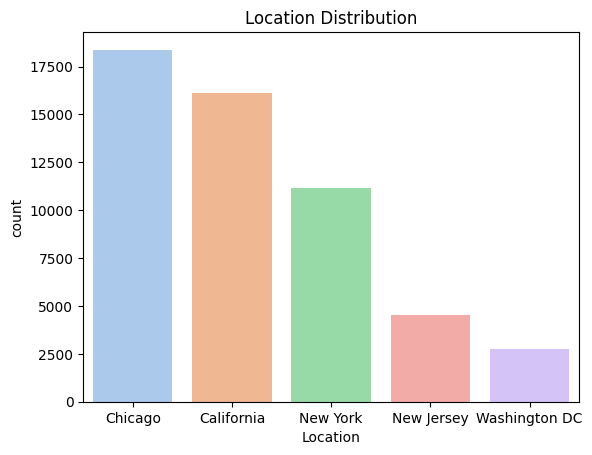

In [15]:
sns.countplot(data=df, x="Location")
plt.title('Location Distribution')

****We can see:****
* There are most transactions from Chicago, while there are least transactions from Washington DC

### Online and Offline Transaction

In [16]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')
#df['Month'] = df['Month'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52924 entries, 0 to 52923
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        52924 non-null  float64       
 1   Gender            52924 non-null  object        
 2   Location          52924 non-null  object        
 3   Tenure_Months     52924 non-null  float64       
 4   Transaction_ID    52924 non-null  float64       
 5   Transaction_Date  52924 non-null  datetime64[ns]
 6   Product_Category  52924 non-null  object        
 7   Quantity          52924 non-null  float64       
 8   Avg_Price         52924 non-null  float64       
 9   Delivery_Charges  52924 non-null  float64       
 10  Coupon_Status     52924 non-null  object        
 11  GST               52924 non-null  float64       
 12  Date              52924 non-null  datetime64[ns]
 13  Offline_Spend     52924 non-null  float64       
 14  Online_Spend      52924 non

#### Online Transaction

In [17]:
Monthly_Online_Transaction = df.groupby('Month')['Online_Spend'].sum()
Monthly_Online_Transaction.head(10)

Month
2019-01     7686875.17
2019-02     6360136.05
2019-03     6965280.31
2019-04     8196922.13
2019-05     7574021.02
2019-06     7436403.73
2019-07     9055934.41
2019-08    11551233.77
2019-09     7371126.34
2019-10     7813772.39
Freq: M, Name: Online_Spend, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '2019-01'),
  Text(1, 0, '2019-02'),
  Text(2, 0, '2019-03'),
  Text(3, 0, '2019-04'),
  Text(4, 0, '2019-05'),
  Text(5, 0, '2019-06'),
  Text(6, 0, '2019-07'),
  Text(7, 0, '2019-08'),
  Text(8, 0, '2019-09'),
  Text(9, 0, '2019-10'),
  Text(10, 0, '2019-11'),
  Text(11, 0, '2019-12')])

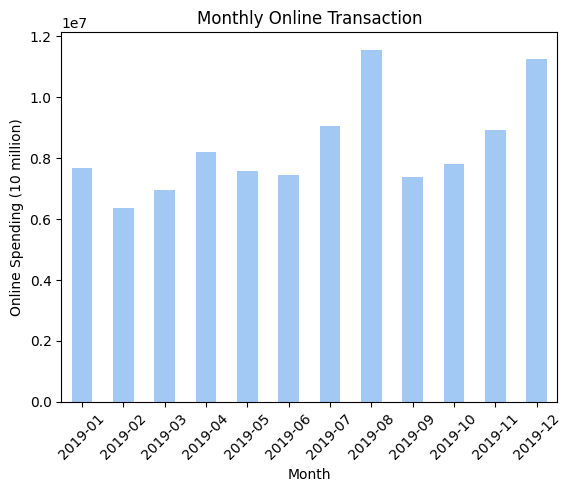

In [18]:
Monthly_Online_Transaction.plot(kind='bar')
plt.title('Monthly Online Transaction')
plt.xlabel('Month')
plt.ylabel('Online Spending (10 million)')
plt.xticks(rotation=45)

#### Offline Transaction

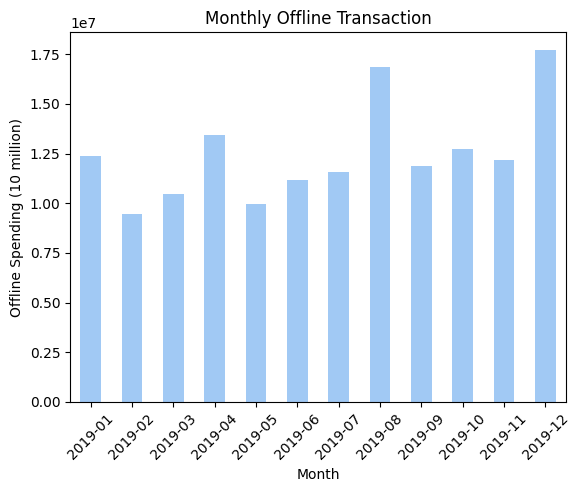

In [19]:
# 改橘色
Monthly_Offline_Transaction = df.groupby('Month')['Offline_Spend'].sum()
Monthly_Offline_Transaction.plot(kind='bar')
plt.title('Monthly Offline Transaction')
plt.xlabel('Month')
plt.ylabel('Offline Spending (10 million)')
plt.xticks(rotation=45)
plt.show()

In [20]:
Monthly_Transaction = df.groupby('Month').agg \
                    (monthly_online_spend=('Online_Spend','sum'), \
                    monthly_offline_spend=('Offline_Spend','sum'))

In [21]:
Monthly_Transaction = Monthly_Transaction.reset_index()
Monthly_Transaction.index += 1
Monthly_Transaction.head()

,Month,monthly_online_spend,monthly_offline_spend
1,2019-01,7686875.17,12365900.0
2,2019-02,6360136.05,9481400.0
3,2019-03,6965280.31,10488500.0
4,2019-04,8196922.13,13459000.0
5,2019-05,7574021.02,9951500.0


#### Online vs Offline Transaction

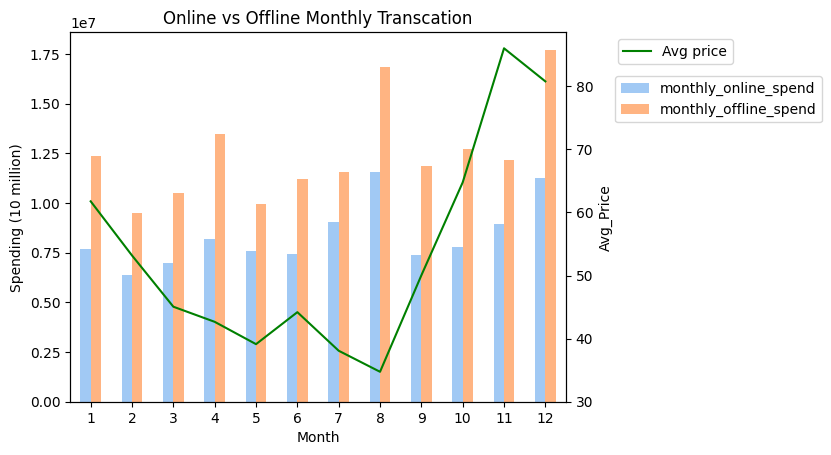

In [22]:
ax1 = Monthly_Transaction.plot(kind='bar')
plt.title('Online vs Offline Monthly Transcation')
plt.xticks(rotation=360)
plt.xlabel('Month')
ax1.set_ylabel('Spending (10 million)')
ax1.legend(loc='upper right', bbox_to_anchor=(1.53, 0.9))

df_avgprice = df.groupby(['Month']).agg(avgprice = ('Avg_Price' , 'mean'))
ax2 = ax1.twinx()
ax2_plot = ax2.plot(ax1.get_xticks(), df_avgprice.values, color='g')
ax2.set_yticks([30,40,50,60,70,80])
ax2.set_ylabel('Avg_Price')
ax2.legend(['Avg price'], loc='upper right', bbox_to_anchor=(1.35, 1.0))

plt.show()
#需要show legend

In [23]:
df_avgprice.head(12)

,avgprice
Month,
2019-01,61.756055
2019-02,53.171443
2019-03,45.055541
2019-04,42.660465
2019-05,39.122417
2019-06,44.192690
2019-07,38.078315
2019-08,34.743348
2019-09,50.030893


****We can see:****
* August and December are the sales peaks of the year
* Offline spending is higher than online spending

### Product Category

#### First let's explore which product category contributed to most transactions

Text(0.5, 1.0, 'Product Category Distribution')

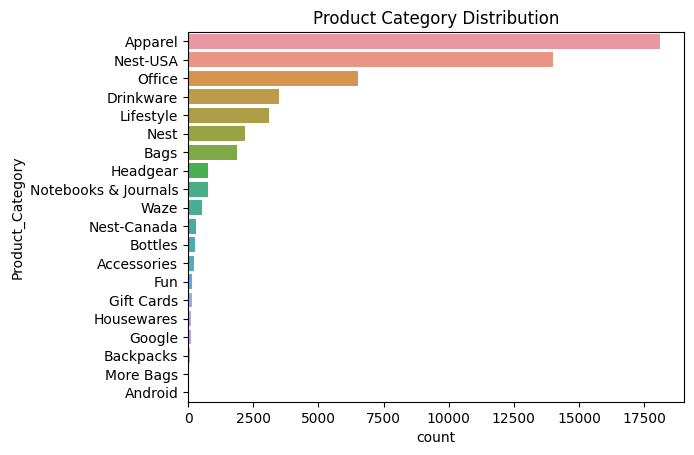

In [24]:
sns.countplot(data=df, y="Product_Category", order=df["Product_Category"].value_counts().index)
plt.title('Product Category Distribution')

****We can see:****
* Most Transactions belongs to Apparel
* Top 5 product category: Apparel, Nest-USA, Office, Drinkware, Lifestyle

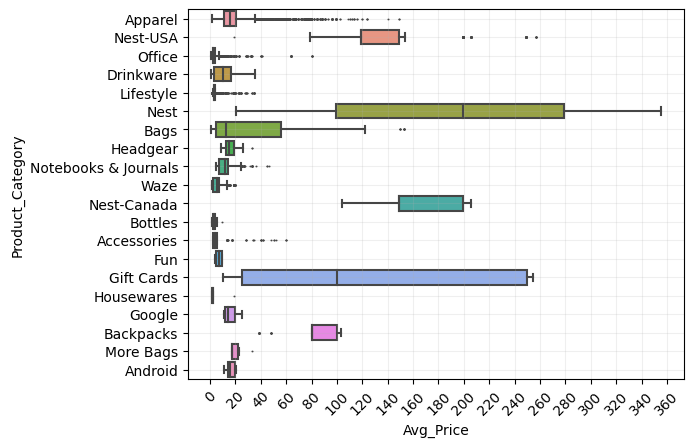

In [25]:
sns.boxplot(data=df, x='Avg_Price', y='Product_Category', order=df["Product_Category"].value_counts().index, \
           fliersize=0.5, showfliers=True)
plt.xticks([0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360], rotation=45)
plt.grid(visible=True, alpha=0.2)

**We can see:**
* The price of apparel has a lot of outliers, which indicates there are some products with significantly higher average prices compared to the majority of apparel products
* The mean prices of most product categories is around \$20
* The price range of most product categories is around \$0 - \$40
* Nest-USA, Nest, Nest-Canada, Gift Cards, Backpacks has higher mean  prices and price range than other categories

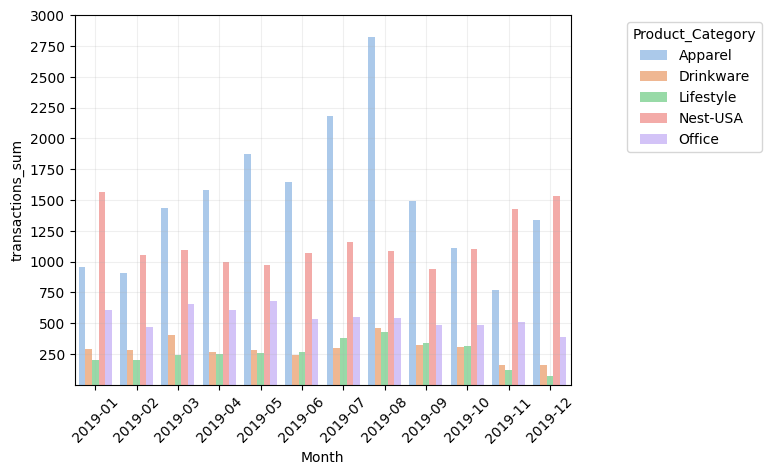

In [26]:
df_producttop5 = df[df['Product_Category'].isin(['Apparel','Drinkware','Lifestyle','Nest-USA','Office'])]
df_monthlytransactions = df_producttop5.groupby(['Month','Product_Category']).agg(transactions_sum = ('Transaction_ID','count'))
df_monthlytransactions = df_monthlytransactions.reset_index()
barplot_monthlytransactionsy = sns.barplot(data=df_monthlytransactions, x='Month', y='transactions_sum', hue='Product_Category')
plt.xticks(rotation=45)
plt.yticks([250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000])
plt.grid(visible=True, alpha=0.2)
sns.move_legend(barplot_monthlytransactionsy, 'upper right', bbox_to_anchor=(1.4, 1.0))

**We can see:**
* Apparel: The number of transactions were significantly high in August.
* Drinkware: The transactions were equally disperesed in every month. The peak of transactions were in August.
* Lifestyle: The transactions were equally disperesed in every month. The peak of transactions were in August.
* Nest-USA: The number of transactions were highest in January, second highest in December, suggesting that Nest-USA might be products that have higher demand in winter.
* Office: The transactions were equally disperesed in every month. The peak of transactions were in May.

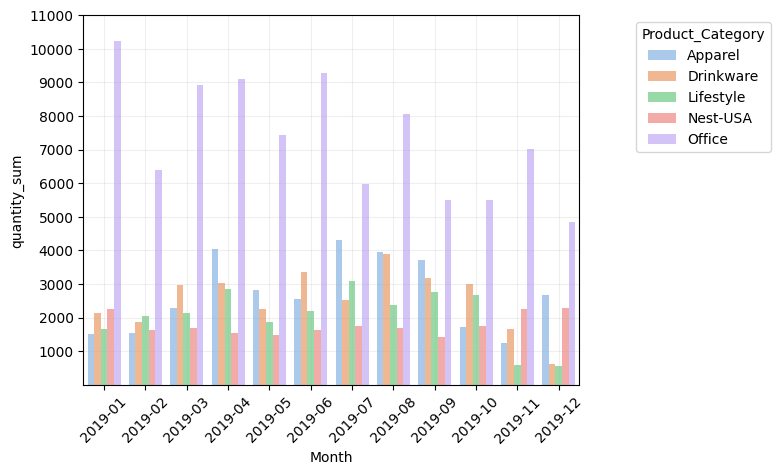

In [27]:
df_monthlyquantity = df_producttop5.groupby(['Month','Product_Category']).agg(quantity_sum = ('Quantity','sum'))
df_monthlyquantity = df_monthlyquantity.reset_index()
barplot_monthlyquantity = sns.barplot(data=df_monthlyquantity, x='Month', y='quantity_sum', hue='Product_Category')
plt.xticks(rotation=45)
plt.yticks([1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000])
plt.grid(visible=True, alpha=0.2)
sns.move_legend(barplot_monthlyquantity, 'upper right', bbox_to_anchor=(1.4, 1.0))

**We can see:**
* Overall, the quantity sold of office product were higher than other product category.
* Apparel: The quantity sold were relatively high in July, April and August.
* Drinkware: The quantity sold were relatively high in August.
* Lifestyle: The quantity sold were relatively high in July, April and September.
* Nest-USA: The quantity sold were relatively high in November, January and December.
* Office: The peak of quantity sold were in January.

### Customer Tenure

In [28]:
df["CustomerID"] = df["CustomerID"].astype(str)
print(df.dtypes)

CustomerID                  object
Gender                      object
Location                    object
Tenure_Months              float64
Transaction_ID             float64
Transaction_Date    datetime64[ns]
Product_Category            object
Quantity                   float64
Avg_Price                  float64
Delivery_Charges           float64
Coupon_Status               object
GST                        float64
Date                datetime64[ns]
Offline_Spend              float64
Online_Spend               float64
Month                    period[M]
Discount_pct               float64
dtype: object


In [29]:
# Now we want to understand each customer's behavior, thus we need to drop duplicated CustomerID columns
df_tenuremonths = df.drop_duplicates(subset=['CustomerID','Location'])
df_tenuremonths.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Discount_pct
0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,Nest-USA,1.0,153.71,6.5,Used,0.1,2019-01-01,4500.0,2424.5,2019-01,10.0
23,13047.0,M,California,43.0,16684.0,2019-01-01,Nest-USA,2.0,122.77,6.5,Clicked,0.1,2019-01-01,4500.0,2424.5,2019-01,10.0
27,12583.0,M,Chicago,33.0,16694.0,2019-01-01,Nest-USA,1.0,122.77,6.5,Not Used,0.1,2019-01-01,4500.0,2424.5,2019-01,10.0
28,15100.0,M,California,49.0,16712.0,2019-01-01,Nest-USA,1.0,153.71,6.5,Clicked,0.1,2019-01-01,4500.0,2424.5,2019-01,10.0
29,14688.0,F,New York,46.0,16732.0,2019-01-01,Nest-USA,1.0,153.71,6.5,Clicked,0.1,2019-01-01,4500.0,2424.5,2019-01,10.0


(-2.0, 50.0)

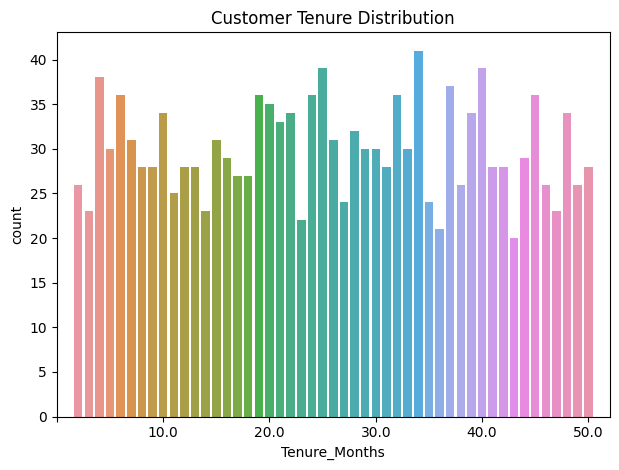

In [30]:
sns.countplot(data=df_tenuremonths, x='Tenure_Months')
plt.title('Customer Tenure Distribution')
plt.xticks([-2,8,18,28,38,48])
plt.tight_layout()
plt.xlim(-2,50)

([<matplotlib.axis.YTick at 0x7e9b605c0820>,
 [Text(0, 0, '0'),
  Text(0, 5, '5'),
  Text(0, 10, '10'),
  Text(0, 15, '15'),
  Text(0, 20, '20'),
  Text(0, 25, '25'),
  Text(0, 30, '30'),
  Text(0, 35, '35'),
  Text(0, 40, '40'),
  Text(0, 45, '45'),
  Text(0, 50, '50')])

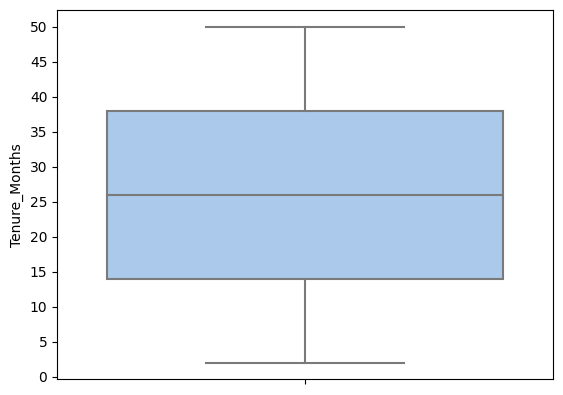

In [31]:
sns.boxplot(data=df_tenuremonths, y='Tenure_Months')
plt.yticks([0,5,10,15,20,25,30,35,40,45,50])

**We can see:**
* The number of customer is quite equally dispersed in different tenure (range from 0-50)
* Customers have been associated with the plaform for 26 months on average

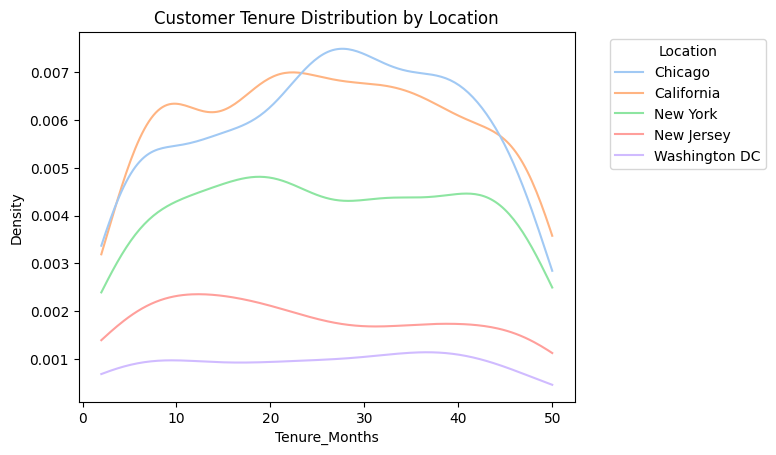

In [32]:
kde_plot = sns.kdeplot(data=df_tenuremonths, x='Tenure_Months', hue='Location', cut=0)
plt.title('Customer Tenure Distribution by Location')
sns.move_legend(kde_plot, 'upper right', bbox_to_anchor=(1.4, 1.0))

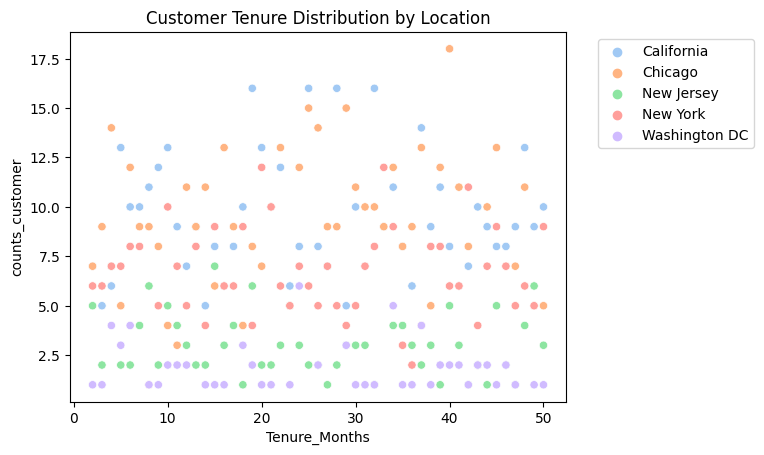

In [33]:
df_tenuremonths_byloc = df_tenuremonths.groupby(['Location','Tenure_Months']).agg(counts_customer=('CustomerID','count'))
sns.scatterplot(data=df_tenuremonths_byloc, x='Tenure_Months', y='counts_customer', hue='Location')
plt.title('Customer Tenure Distribution by Location')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

### Buying Frequency

In [34]:
#Let's calculate buying frequency by counting how many transactions each customer made in 2019
df_customerfrequency = df.groupby(['CustomerID','Tenure_Months','Location','Gender']).agg(frequency = ('Transaction_Date','count'))
df_customerfrequency.head()
df_customerfrequency.describe()
df_customerfrequency.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1468 entries, ('12346.0', 31.0, 'New York', 'F') to ('18283.0', 36.0, 'New Jersey', 'F')
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   frequency  1468 non-null   int64
dtypes: int64(1)
memory usage: 30.8+ KB


In [35]:
df_customerfrequency.head()

,,,,frequency
CustomerID,Tenure_Months,Location,Gender,
12346.0,31.0,New York,F,2
12347.0,20.0,New York,M,60
12348.0,39.0,California,M,23
12350.0,25.0,California,M,17
12356.0,31.0,Chicago,F,36


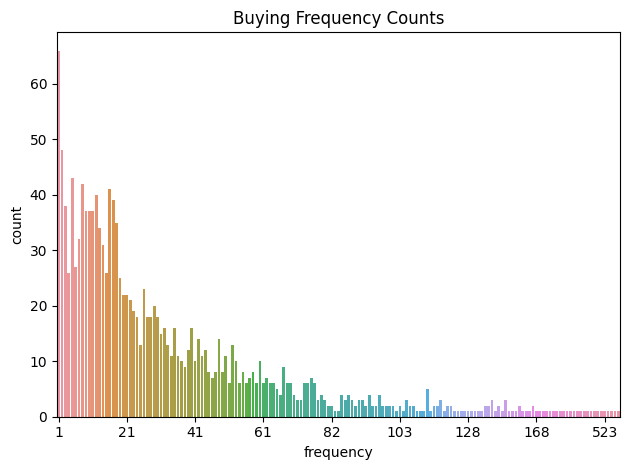

In [36]:
sns.countplot(data=df_customerfrequency, x='frequency')
plt.title('Buying Frequency Counts')
plt.xticks([0,20,40,60,80,100,120,140,160])
plt.tight_layout()

****We can see:****
* Most customers buy only one time in 2019
* Lots of people buy 1-20 times in 2019
* A very small number of people buy more than 100 times in 2019

<Axes: xlabel='Gender', ylabel='frequency'>

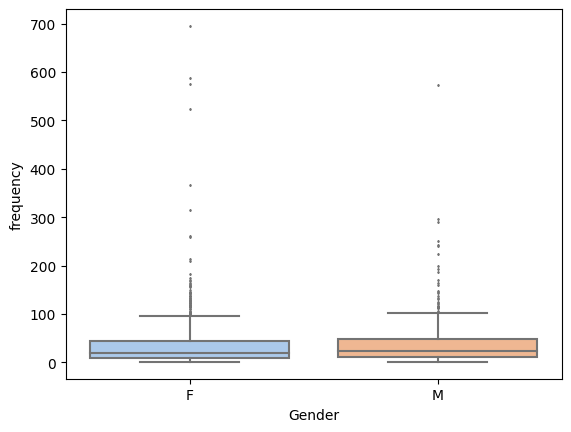

In [37]:
df_genderfrequency = df.groupby(['CustomerID', 'Gender']).agg(frequency = ('Transaction_Date','count'))
df_genderfrequency = df_genderfrequency.reset_index()
sns.boxplot(data=df_genderfrequency, x='Gender', y='frequency', fliersize=1, showfliers=True)

<Axes: xlabel='Gender', ylabel='frequency'>

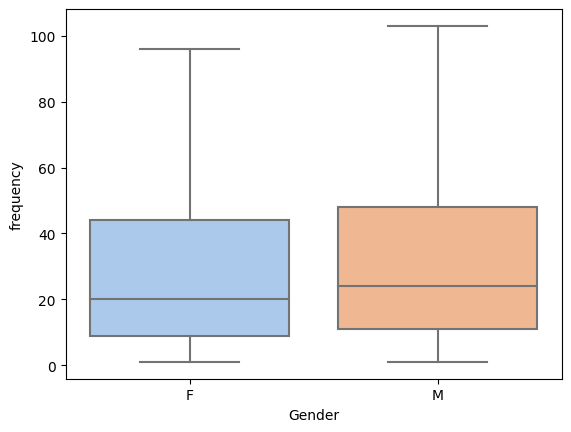

In [38]:
sns.boxplot(data=df_genderfrequency, x='Gender', y='frequency', fliersize=1, showfliers=False)

****We can see:****
* Generally, male has higher buying frequency than female

### Buying Frequency and Tenure

#### Let's explore these questions:
1. Is there relationship between buying frequency and customer tenure?
2. How the buying frequency varies **based on gender** for different customer tenure?

<Axes: xlabel='Tenure_Months', ylabel='frequency'>

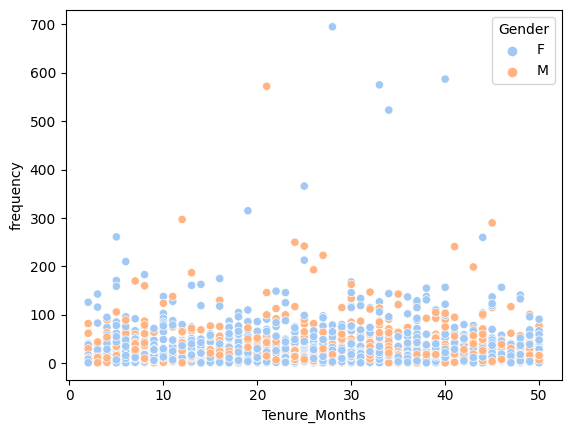

In [39]:
sns.scatterplot(data=df_customerfrequency, x='Tenure_Months', y='frequency', hue='Gender')

**We can see:**
* There is no obvious relationship between buying frequency and customer tenure
* Some female who have longer tenure tend to buy much more times than average

#### Now Let's explore:
1. How the buying frequency varies **based on Location** for different customer tenure?

<Axes: xlabel='Tenure_Months', ylabel='frequency'>

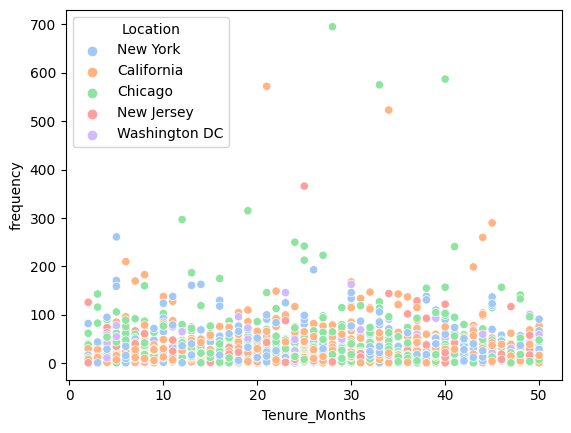

In [40]:
sns.scatterplot(data=df_customerfrequency, x='Tenure_Months', y='frequency', hue='Location')

**We can see:**
* It is difficult to tell the relationship between buying frequency and tenure based on different cities because there are outliers in Chicago and California in the plot
* So let's break down to each city so that we can look at the relationship between buying frequency and tenure clearly
* We will focus on New York, New Jersey, and Washington DC because it is particularly hard to tell their data in the above plot

#### Buying Frequency of Customers with Different Tenure in New York

Text(0.5, 1.0, 'Buying Frequency of Customers with Different Tenure in New York')

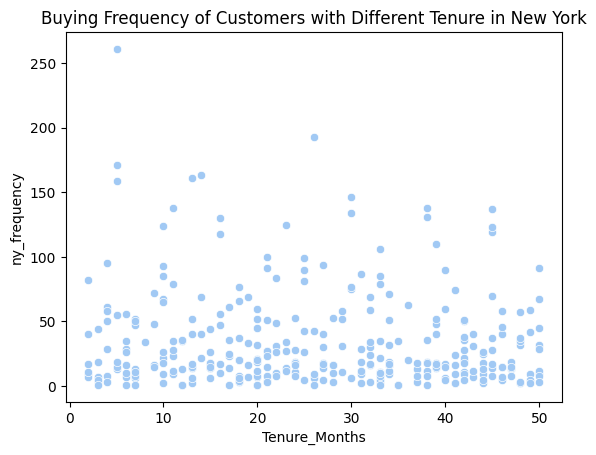

In [41]:
df_newyork = df[df['Location'].isin(['New York'])]
df_customerfrequency_ny = df_newyork.groupby(['CustomerID','Tenure_Months']).agg(ny_frequency = ('Transaction_Date','count'))
sns.scatterplot(data=df_customerfrequency_ny, x='Tenure_Months', y='ny_frequency')
plt.title('Buying Frequency of Customers with Different Tenure in New York')

<Axes: >

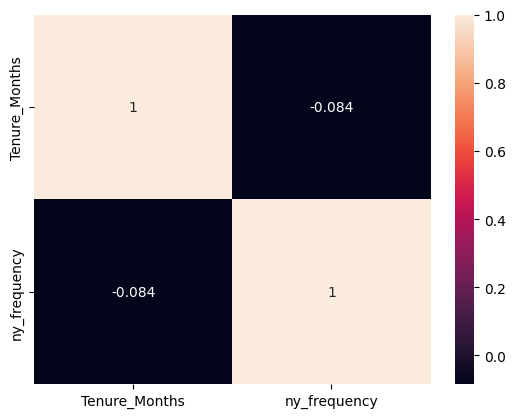

In [42]:
df_customerfrequency_ny = df_customerfrequency_ny.reset_index()
sns.heatmap(df_customerfrequency_ny.corr(numeric_only = True), annot=True)

**We can see:**
* There is no linear relationship bewteen customer tenure and buying frequency in New York


#### Buying Frequency of Customers with Different Tenure in New Jersey

Text(0.5, 1.0, 'Buying Frequency of Customers with Different Tenure in New Jersey')

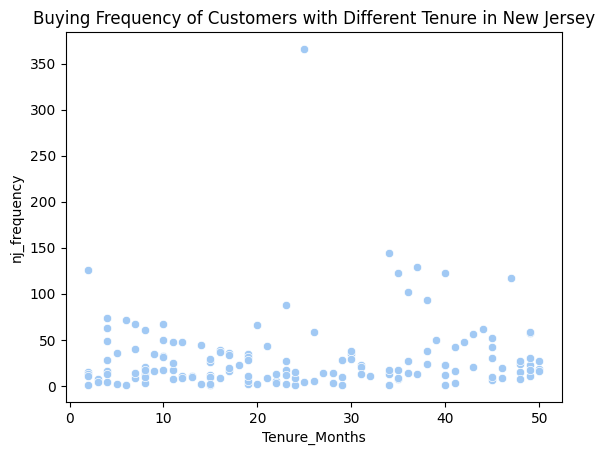

In [43]:
df_newjersey = df[df['Location'].isin(['New Jersey'])]
df_customerfrequency_nj= df_newjersey.groupby(['CustomerID','Tenure_Months']).agg(nj_frequency = ('Transaction_Date','count'))
sns.scatterplot(data=df_customerfrequency_nj, x='Tenure_Months', y='nj_frequency')
plt.title('Buying Frequency of Customers with Different Tenure in New Jersey')

<Axes: >

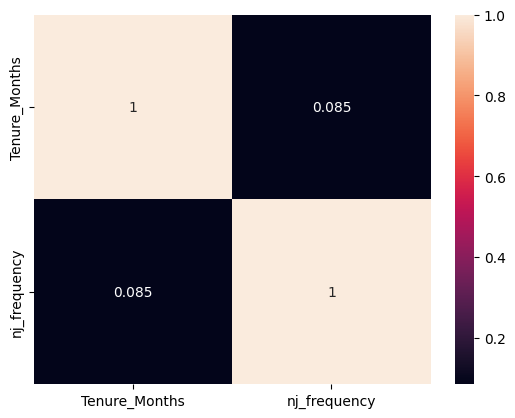

In [44]:
df_customerfrequency_nj = df_customerfrequency_nj.reset_index()
sns.heatmap(df_customerfrequency_nj.corr(numeric_only = True), annot=True)

**We can see:**
* There is no linear relationship bewteen customer tenure and buying frequency in New Jersey

#### Buying Frequency of Customers with Different Tenure in Washington DC

Text(0.5, 1.0, 'Buying Frequency of Customers with Different Tenure in Washington DC')

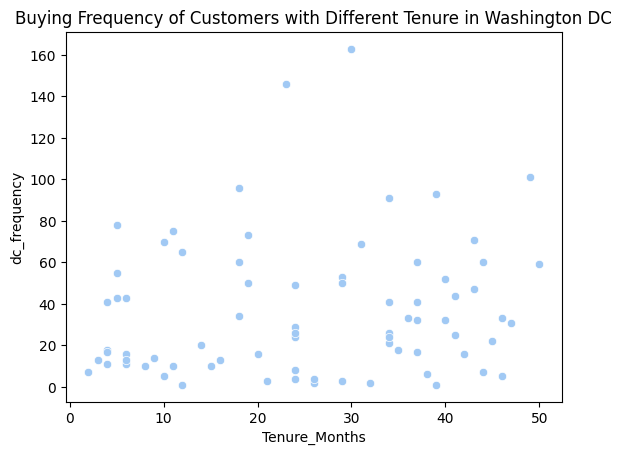

In [45]:
df_dc = df[df['Location'].isin(['Washington DC'])]
df_customerfrequency_dc= df_dc.groupby(['CustomerID','Tenure_Months']).agg(dc_frequency = ('Transaction_Date','count'))
sns.scatterplot(data=df_customerfrequency_dc, x='Tenure_Months', y='dc_frequency')
plt.title('Buying Frequency of Customers with Different Tenure in Washington DC')

<Axes: >

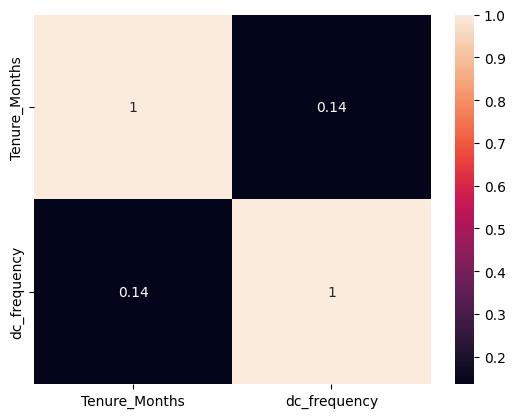

In [46]:
df_customerfrequency_dc = df_customerfrequency_dc.reset_index()
sns.heatmap(df_customerfrequency_dc.corr(numeric_only = True), annot=True)

****We can see:****
* There is no linear relationship bewteen customer tenure and buying frequency in Washington DC.

In [47]:
df_customerfrequency = df_customerfrequency.reset_index() #Transform index 
#df_customerfrequency = df_customerfrequency.drop(columns=['level_0','index']) #drop unnecessary index
df_customerfrequency.head()

,CustomerID,Tenure_Months,Location,Gender,frequency
0,12346.0,31.0,New York,F,2
1,12347.0,20.0,New York,M,60
2,12348.0,39.0,California,M,23
3,12350.0,25.0,California,M,17
4,12356.0,31.0,Chicago,F,36


<Axes: >

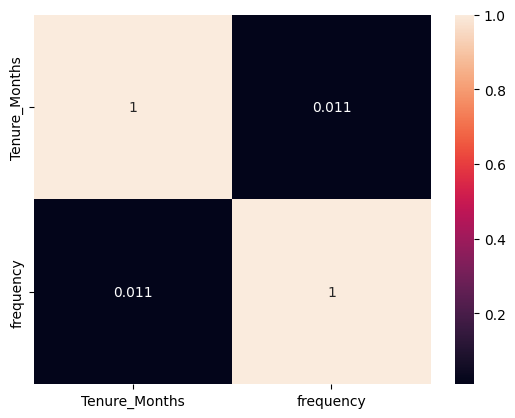

In [48]:
sns.heatmap(df_customerfrequency.corr(numeric_only=True), annot=True)

**We can see:**
* Overall, there is no linear relationship bewteen customer tenure and buying frequency.

### Product Category and Tenure

<Axes: xlabel='Tenure_Months', ylabel='quantity_sum'>

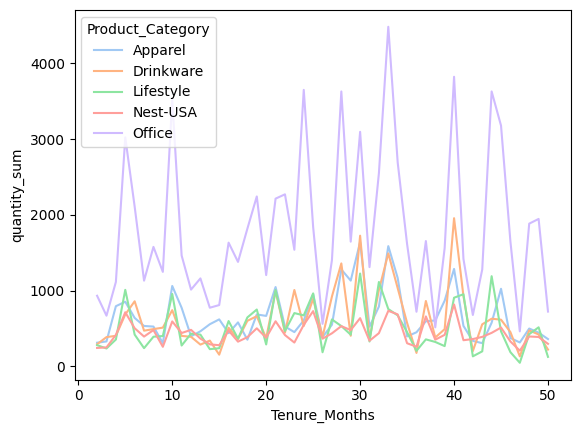

In [49]:
df_productcattop5 = df[df['Product_Category'].isin(['Apparel','Drinkware','Lifestyle','Nest-USA','Office'])]
df_quantity = df_producttop5.groupby(['Tenure_Months','Product_Category']).agg(quantity_sum = ('Quantity','sum'))
sns.lineplot(data=df_quantity, x='Tenure_Months', y='quantity_sum', hue='Product_Category')

<Axes: >

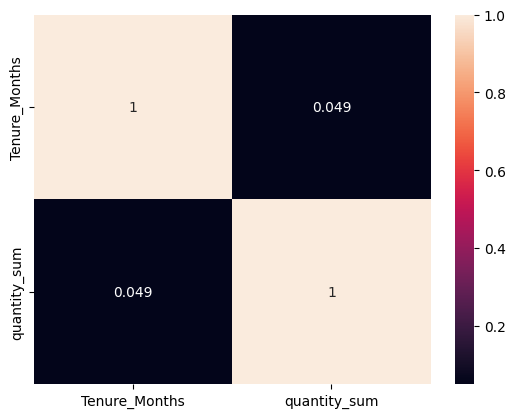

In [50]:
df_quantity = df_quantity.reset_index() #Transform index 
sns.heatmap(df_quantity.corr(numeric_only=True), annot=True)

**We can see:**
* There is no linear relationship between buying quantity and customer tenure.

### Coupon

Text(0.5, 1.0, 'Coupon Status')

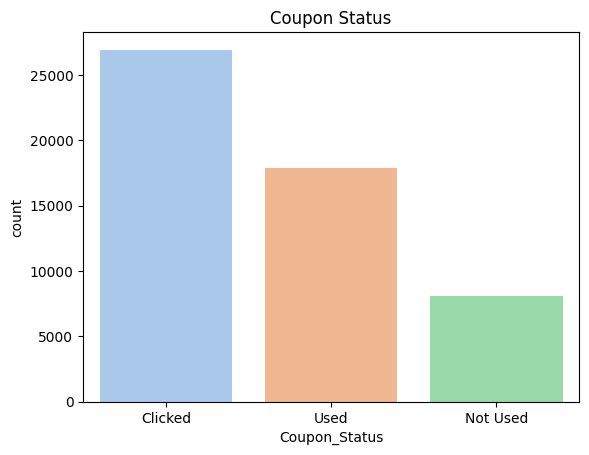

In [51]:
sns.countplot(data=df, x='Coupon_Status', order=df['Coupon_Status'].value_counts().index)
plt.title('Coupon Status')

In [52]:
df_coupon = df.groupby(['Coupon_Status','Month','Tenure_Months']).agg(customercounts = ('CustomerID', 'count')) #確認是否需要drop duplicate customer id

In [53]:
df_coupon = df_coupon.reset_index()

<Axes: xlabel='Tenure_Months', ylabel='customercounts'>

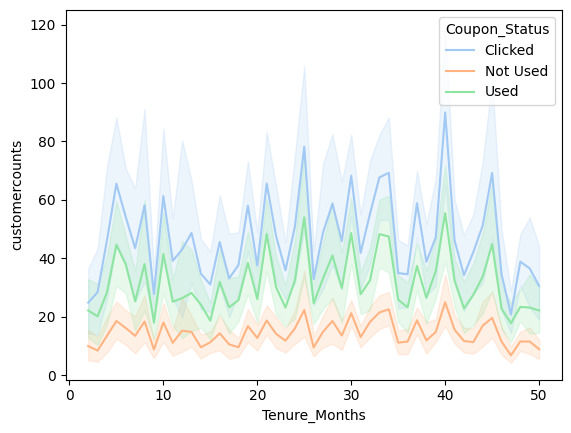

In [54]:
sns.lineplot(data=df_coupon, x='Tenure_Months', y='customercounts', hue='Coupon_Status')

**We can see:**
* There is no obvious relationship between customer tenure and whether they use coupon or not


Text(0.5, 1.0, 'Coupon Percentage')

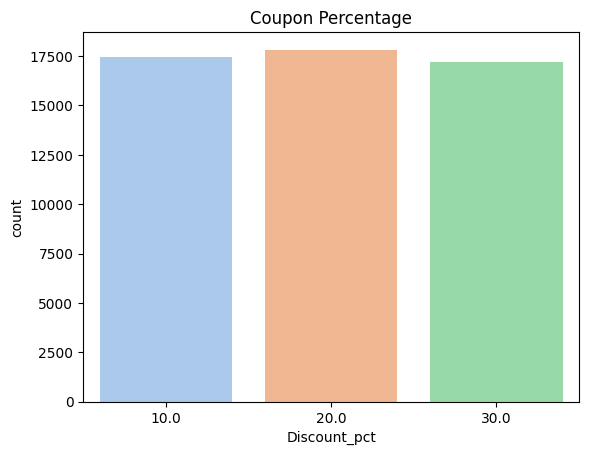

In [55]:
sns.countplot(data=df, x='Discount_pct')
plt.title('Coupon Percentage')

In [56]:
df_usedcoupon = df[df['Coupon_Status'].isin(['Used'])].copy()
df_usedcoupon['Month'] = df_usedcoupon['Month'].astype(str)
df_usedcoupon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17904 entries, 0 to 52922
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        17904 non-null  object        
 1   Gender            17904 non-null  object        
 2   Location          17904 non-null  object        
 3   Tenure_Months     17904 non-null  float64       
 4   Transaction_ID    17904 non-null  float64       
 5   Transaction_Date  17904 non-null  datetime64[ns]
 6   Product_Category  17904 non-null  object        
 7   Quantity          17904 non-null  float64       
 8   Avg_Price         17904 non-null  float64       
 9   Delivery_Charges  17904 non-null  float64       
 10  Coupon_Status     17904 non-null  object        
 11  GST               17904 non-null  float64       
 12  Date              17904 non-null  datetime64[ns]
 13  Offline_Spend     17904 non-null  float64       
 14  Online_Spend      17904 non

In [57]:
df_usedcouponpct = df_usedcoupon.groupby(['Month','Discount_pct']).agg(customer_counts = ('Transaction_ID','count'))
df_usedcouponpct = df_usedcouponpct.reset_index()
df_usedcouponpct.head()

,Month,Discount_pct,customer_counts
0,2019-01,10.0,1370
1,2019-02,20.0,1084
2,2019-03,30.0,1458
3,2019-04,10.0,1414
4,2019-05,20.0,1475


Text(0.5, 1.0, 'Coupon Usage by Month')

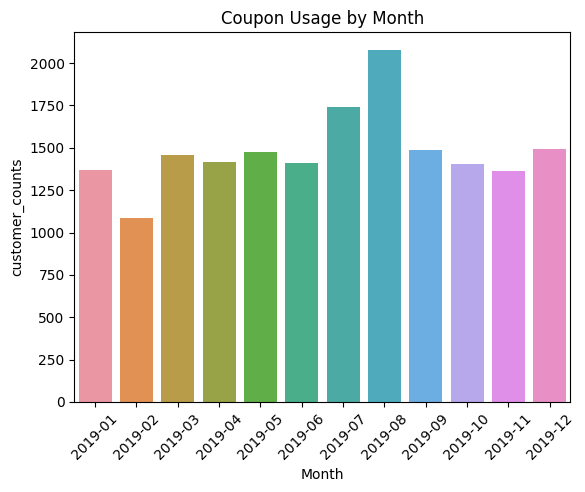

In [58]:
sns.barplot(data=df_usedcouponpct, x='Month', y='customer_counts')
plt.xticks(rotation=45)
plt.title('Coupon Usage by Month')

****We can see:****
* Coupons were used the most in August

Text(0.5, 1.0, 'Coupon Discount by Month')

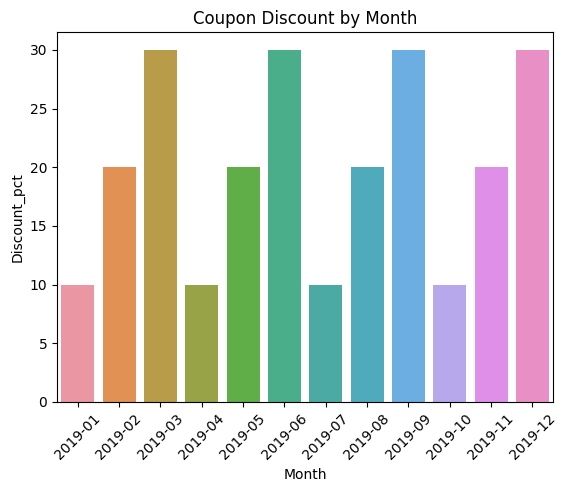

In [59]:
sns.barplot(data=df_usedcouponpct, x='Month', y='Discount_pct')
plt.xticks(rotation=45)
plt.title('Coupon Discount by Month')

**We can see:**
* There is a cycle of the discount of coupons - the 10%, 20%, 30% discount appear once in three months
* 10% off : January, April, July, October
* 20% off : Febuary, May, August, November
* 30% off : March, June, September, December
* **An interesting insight**: In August, coupons were used the most; however, the discount rate of coupon was 20% off, not the highest discount rate of the year